In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Fill Age with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipykernel_23/455995927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
# Creating a new feature to indicate the presence of a cabin
df['Cabin_known'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)


In [6]:
# Fill missing values in 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_23/2928582199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


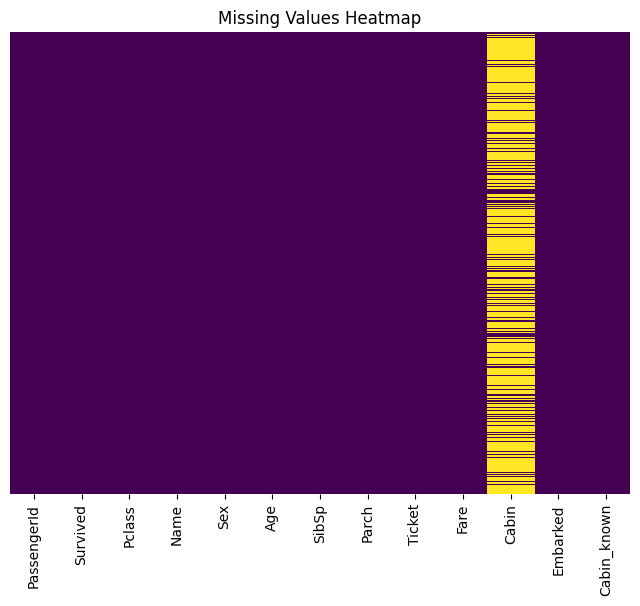

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


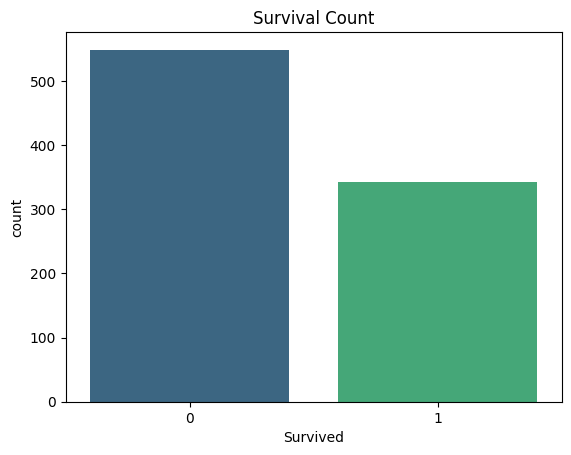

In [8]:
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.show()


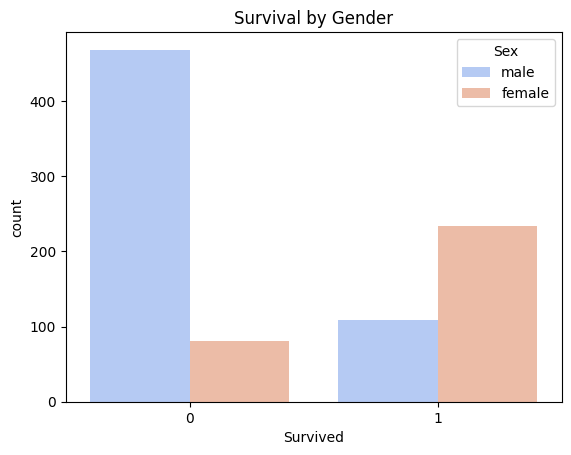

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


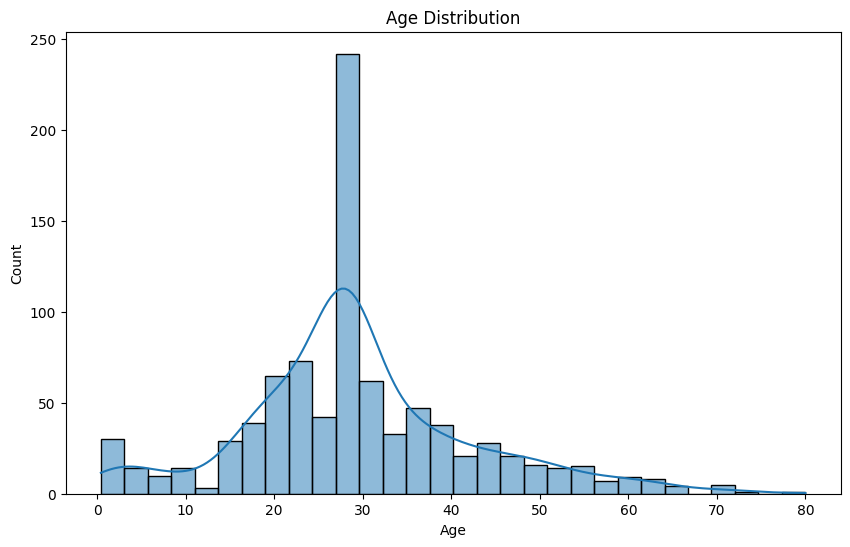

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


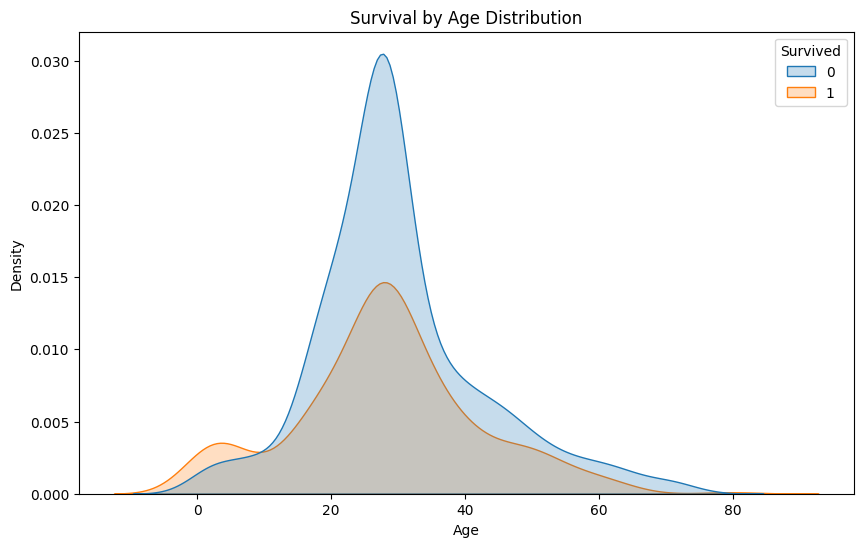

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Survival by Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()


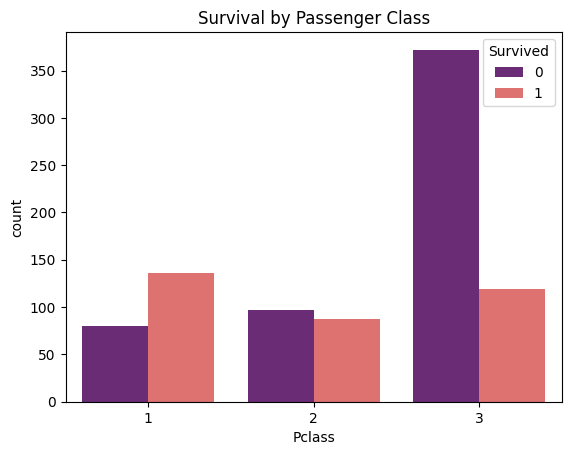

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='magma')
plt.title('Survival by Passenger Class')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


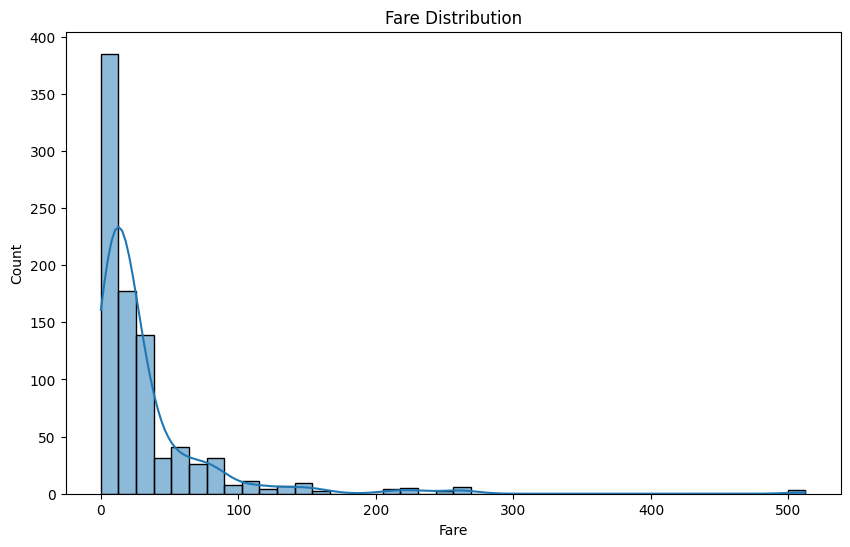

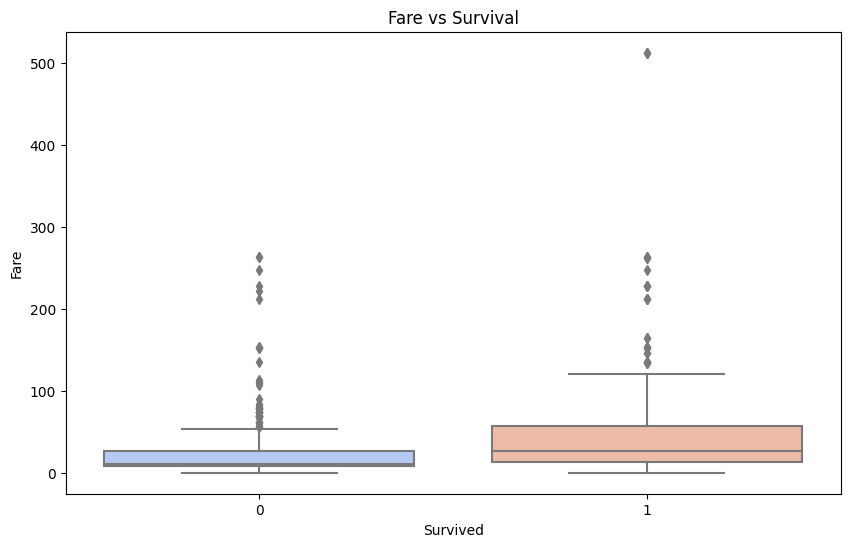

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Fare vs Survival')
plt.show()


In [13]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

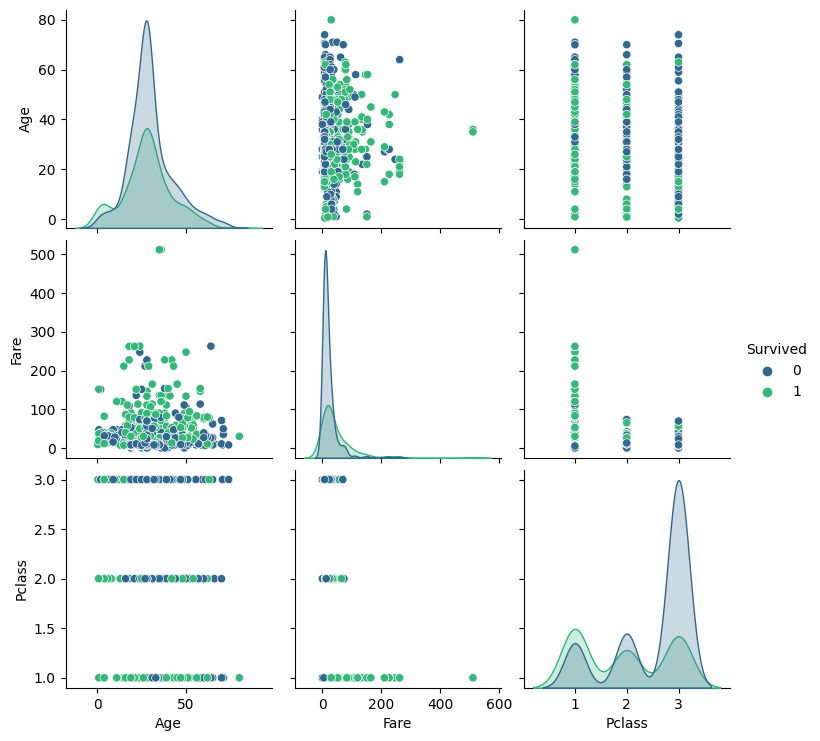

In [14]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='viridis')
plt.show();


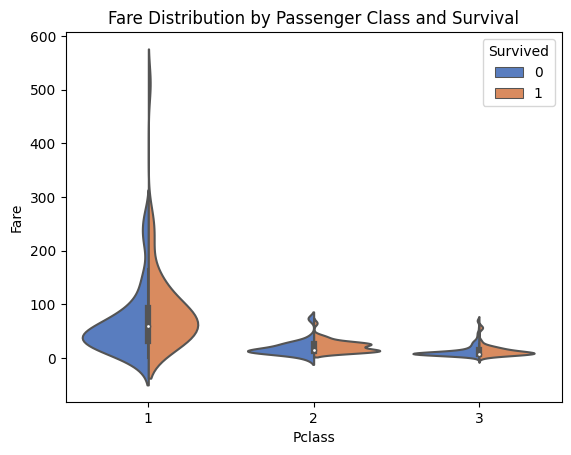

In [15]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True, palette='muted')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()


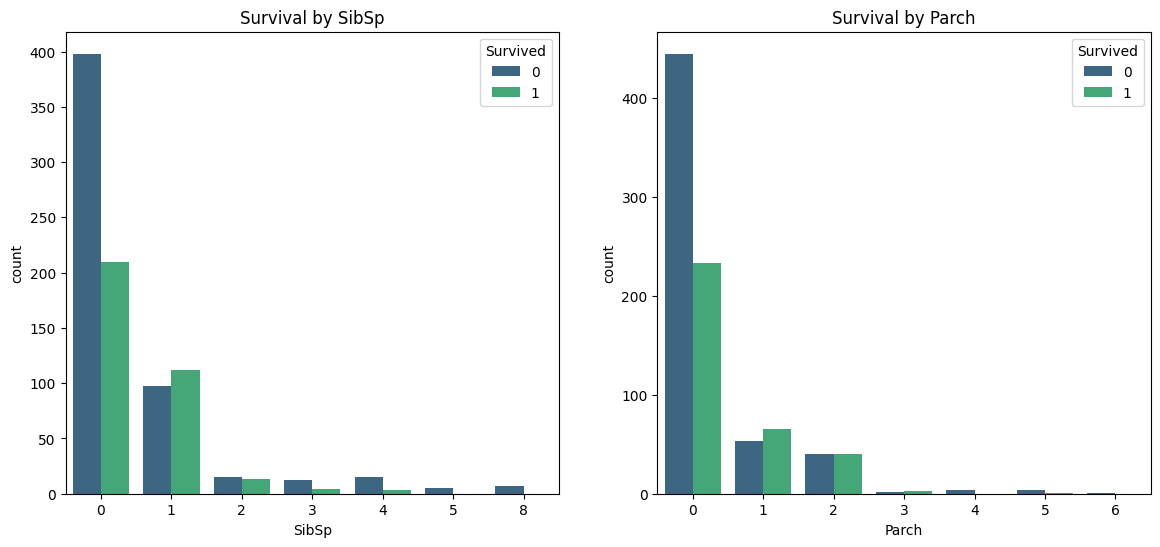

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Survival by SibSp')
sns.countplot(x='Parch', hue='Survived', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Survival by Parch')
plt.show()


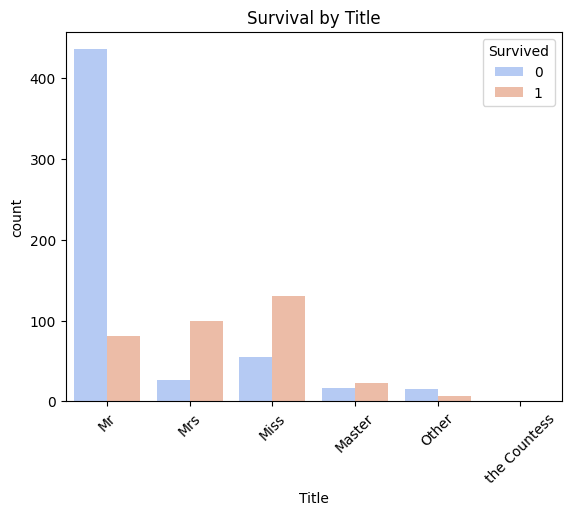

In [17]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Replace rare titles with "Other"
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Visualizing Title by Survival
sns.countplot(x='Title', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()


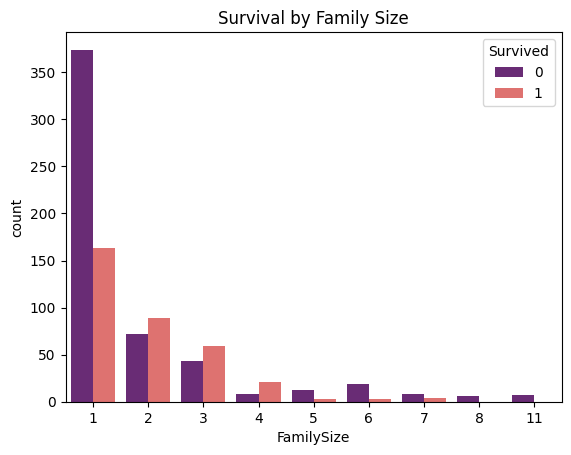

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Visualizing Family Size by Survival
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='magma')
plt.title('Survival by Family Size')
plt.show()


In [19]:
# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# Label encoding for 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [20]:
from sklearn.model_selection import train_test_split

# Features (drop PassengerId, Name, Ticket, Cabin, and Survived)
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)

# Target
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 15), (179, 15), (712,), (179,))